# Credit Card Transactions Fraud Detection

This dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud.

Note: You can access the data via the File menu or in the Context Panel at the top right of the screen next to Report, under Files. The data dictionary and filenames can be found at the bottom of this workbook.

[Source: Kaggle](https://www.kaggle.com/kartik2112/fraud-detection?select=fraudTrain.csv) The data was partially cleaned and adapted by DataCamp.

We've added some guiding questions for analyzing this exciting dataset! Feel free to make this workbook yours by adding and removing cells, or editing any of the existing cells.

## Table of Contents
1. [Setup](#setup)  
2. [Configuration](#configuration)  
3. [Data Loading & Overview](#data-loading--overview)  
4. [EDA (Targeted)](#eda-targeted)  
5. [Preprocessing & Feature Engineering](#preprocessing--feature-engineering)  
6. [Modeling](#modeling)  
7. [Evaluation](#evaluation)  
8. [Threshold Tuning](#threshold-tuning)  
9. [Feature Importance](#feature-importance)  
10. [Model Card & Next Steps](#model-card--next-steps)

### 🔍 **Scenario: Accurately Predict Instances of Credit Card Fraud**

This scenario helps you develop an end-to-end project for your portfolio.

**Background:** A new credit card company has just entered the market in the western United States. The company is promoting itself as one of the safest credit cards to use. They have hired you as their data scientist in charge of identifying instances of fraud. The executive who hired you has have provided you with data on credit card transactions, including whether or not each transaction was fraudulent.

**Objective:** The executive wants to know how accurately you can predict fraud using this data. She has stressed that the model should err on the side of caution: it is not a big problem to flag transactions as fraudulent when they aren't just to be safe. In your report, you will need to describe how well your model functions and how it adheres to these criteria.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

## Data Dictionary

| trans_date_trans_time | Transaction DateTime                        |
|---------------------|---------------------------------------------|
| merchant            | Merchant Name                               |
| category            | Category of Merchant                        |
| amt                 | Amount of Transaction                       |
| city                | City of Credit Card Holder                  |
| state               | State of Credit Card Holder                 |
| lat                 | Latitude Location of Purchase               |
| long                | Longitude Location of Purchase              |
| city_pop            | Credit Card Holder's City Population        |
| job                 | Job of Credit Card Holder                   |
| dob                 | Date of Birth of Credit Card Holder         |
| trans_num           | Transaction Number                          |
| merch_lat           | Latitude Location of Merchant               |
| merch_long          | Longitude Location of Merchant              |
| is_fraud            | Whether Transaction is Fraud (1) or Not (0) |

## 0) Download Data from Kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)

e:\my_project\Credit Card Transactions Fraud Detection\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\apo09\.cache\kagglehub\datasets\kartik2112\fraud-detection\versions\1


In [2]:
import shutil, os

# set directory
target_dir = "./data/fraud-detection"

# create folder
os.makedirs(target_dir, exist_ok=True)

# copy downloaded file to target folder
for filename in os.listdir(path):
    shutil.copy(os.path.join(path, filename), target_dir)

## 1) Exploratory Data Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
test_df = pd.read_csv("data/fraud-detection/fraudTest.csv")
train_df = pd.read_csv("data/fraud-detection/fraudTrain.csv")

In [5]:
train_df = train_df.drop(columns=["Unnamed: 0"])
test_df = test_df.drop(columns=["Unnamed: 0"])

In [6]:
train_df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [8]:
# checking class balance
train_df['is_fraud'].value_counts(normalize=True)

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64

### 1.1) Fraud Distribution

In [9]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

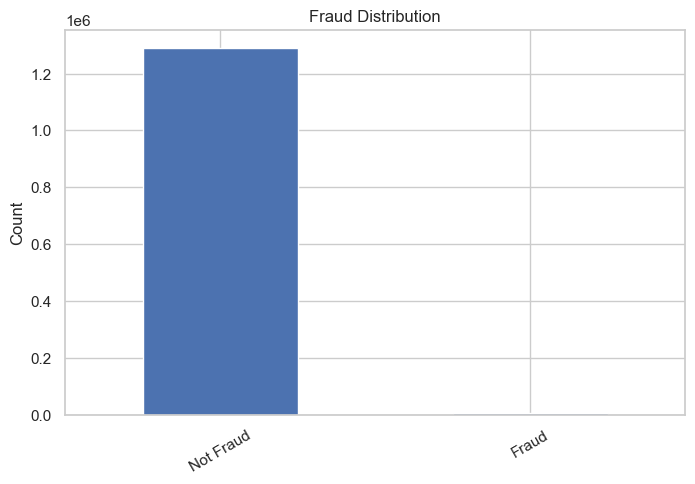

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [10]:
ax = (train_df['is_fraud']
      .value_counts()
      .rename({0: "Not Fraud", 1: "Fraud"})
      .plot(kind='bar'))
ax.set_title("Fraud Distribution")
ax.set_xlabel("")
ax.set_ylabel("Count")
plt.xticks(rotation=30)
plt.show()

# checking class balance
train_df['is_fraud'].value_counts()

### 1.2) Gender vs Fraud

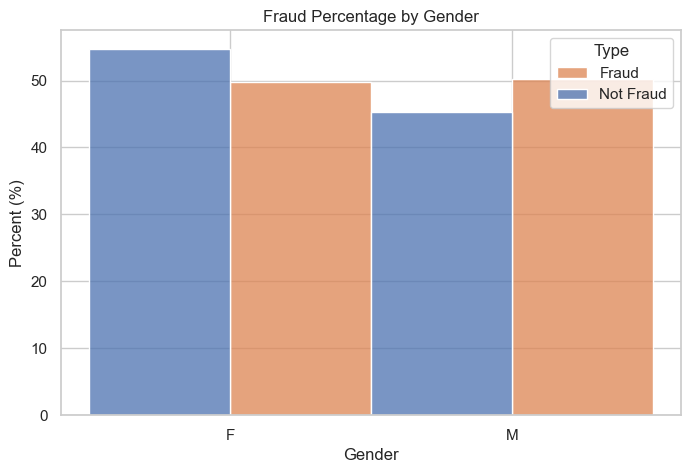

gender  is_fraud
F       0           0.994738
        1           0.005262
M       0           0.993574
        1           0.006426
Name: proportion, dtype: float64

In [11]:
ax = sns.histplot(x='gender',
                  data=train_df,
                  hue='is_fraud',
                  stat='percent',
                  multiple='dodge',
                  common_norm=False)
ax.set_title('Fraud Percentage by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Percent (%)')
plt.legend(title="Type", labels=['Fraud', 'Not Fraud'])
plt.show()

train_df.groupby('gender')['is_fraud'].value_counts(normalize=True)

### 1.3) Transaction Category vs Fraud

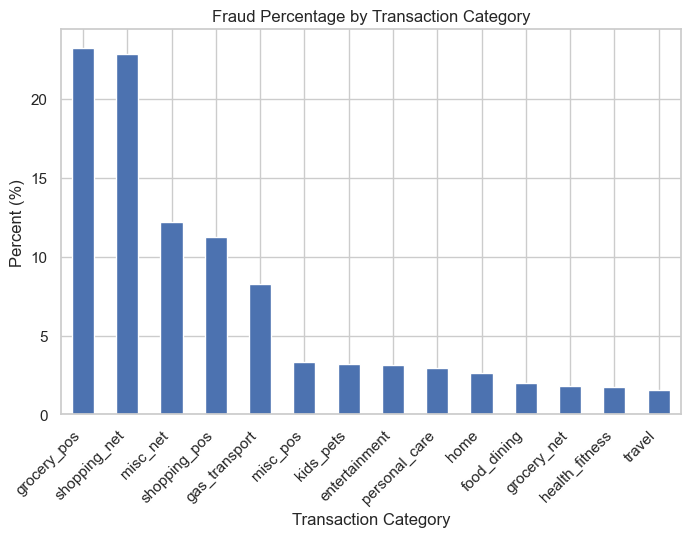

Fraud Percentage by Category
 category
grocery_pos       23.221423
shopping_net      22.821743
misc_net          12.190248
shopping_pos      11.231015
gas_transport      8.233413
misc_pos           3.330669
kids_pets          3.184119
entertainment      3.104183
personal_care      2.930989
home               2.637890
food_dining        2.011724
grocery_net        1.785238
health_fitness     1.771916
travel             1.545430
Name: proportion, dtype: float64


In [12]:
fraud_by_category = train_df[train_df['is_fraud']==1]['category'].value_counts(normalize=True) * 100
ax = (fraud_by_category.plot(kind='bar'))
ax.set_title("Fraud Percentage by Transaction Category")
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Transaction Category')
plt.xticks(rotation=45, ha='right')
plt.show()

print("Fraud Percentage by Category\n", fraud_by_category)

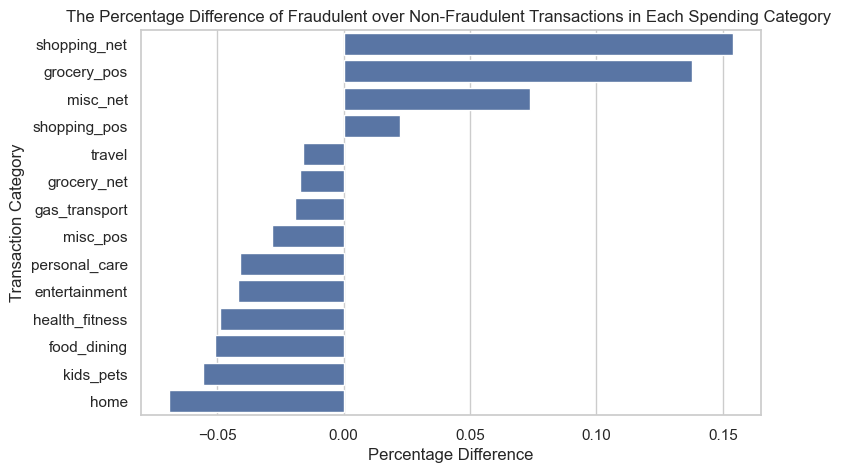

In [13]:
#calculate the percentage difference
a=train_df[train_df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=train_df[train_df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transactions in Each Spending Category ')
plt.show()

### 1.4) Transaction Amount vs Fraud

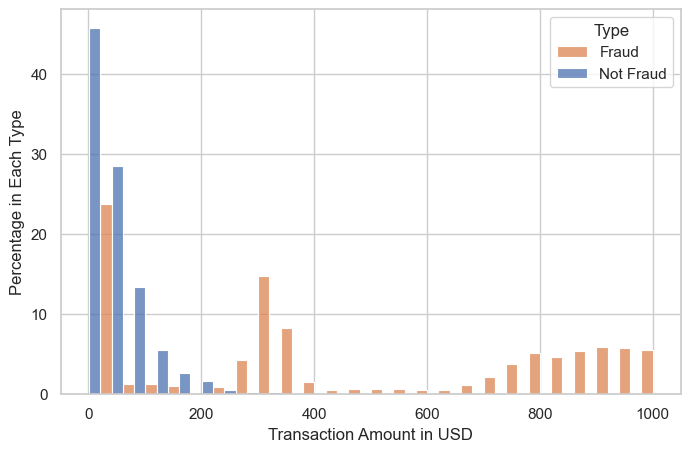

In [14]:
ax=sns.histplot(x='amt',data=train_df[train_df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

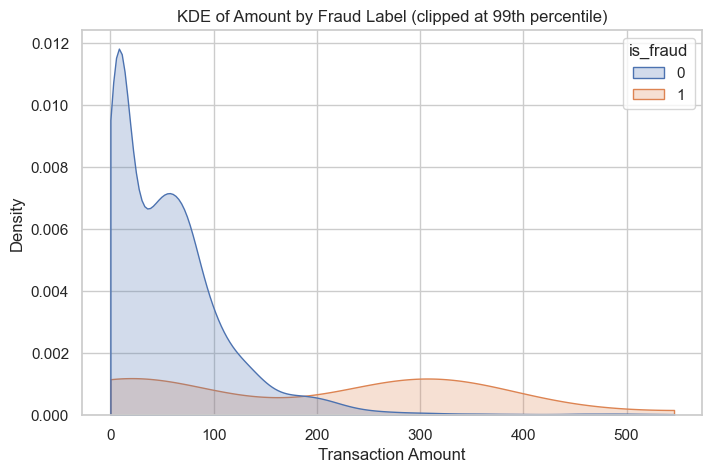

In [15]:
# stratified sample (40% from fraud group)
stratified_sample = (
    train_df
    .groupby('is_fraud', group_keys=False)
    .sample(frac=0.4, random_state=42)
)

# KDE with separate normalization per class, clipped at 0..P99
p99 = np.percentile(train_df['amt'], 99)
sns.kdeplot(
    data=stratified_sample, x="amt", hue="is_fraud",
    common_norm=False, fill=True, clip=(0, p99)
)
plt.title("KDE of Amount by Fraud Label (clipped at 99th percentile)")
plt.xlabel("Transaction Amount")
plt.show()

### 1.5) Age vs Fraud

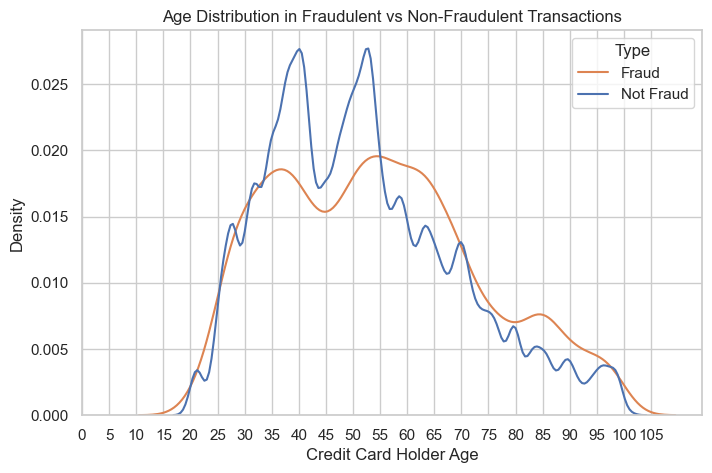

In [16]:
import datetime as dt

train_df['age']=dt.date.today().year-pd.to_datetime(train_df['dob']).dt.year
ax=sns.kdeplot(x='age',data=train_df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

### 1.6) Cyclicality of Credit Card Fraud

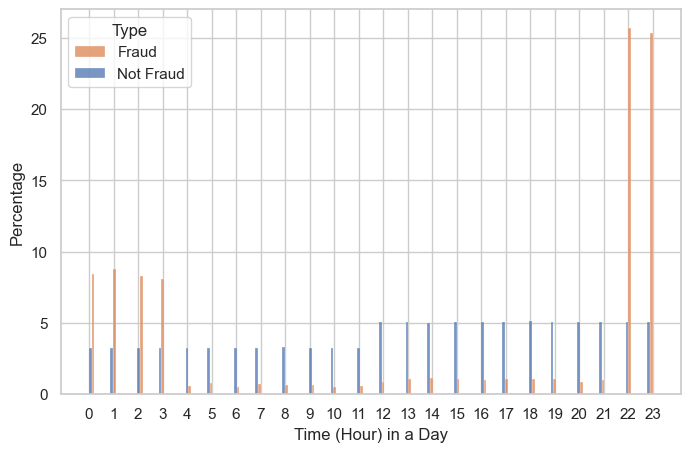

In [17]:
#time in a day vs fraud
train_df['hour']=pd.to_datetime(train_df['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=train_df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

C:\Users\apo09\AppData\Local\Temp\ipykernel_13716\211285858.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


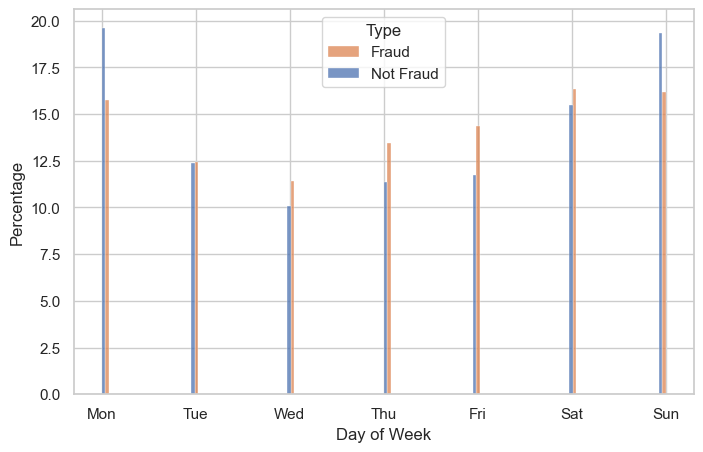

In [18]:
#day of week vs fraud
train_df['day']=pd.to_datetime(train_df['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=train_df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

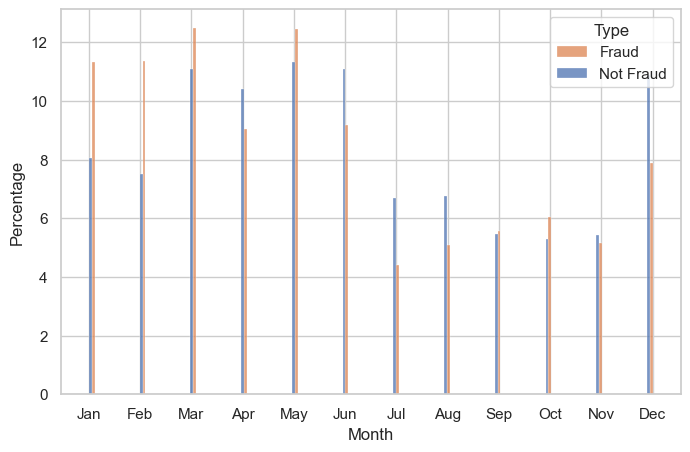

In [19]:
#month vs fraud
train_df['month']=pd.to_datetime(train_df['trans_date_trans_time']).dt.month
ax=sns.histplot(data=train_df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

### 1.7) State vs Fraud

Text(0.5, 1.0, 'The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

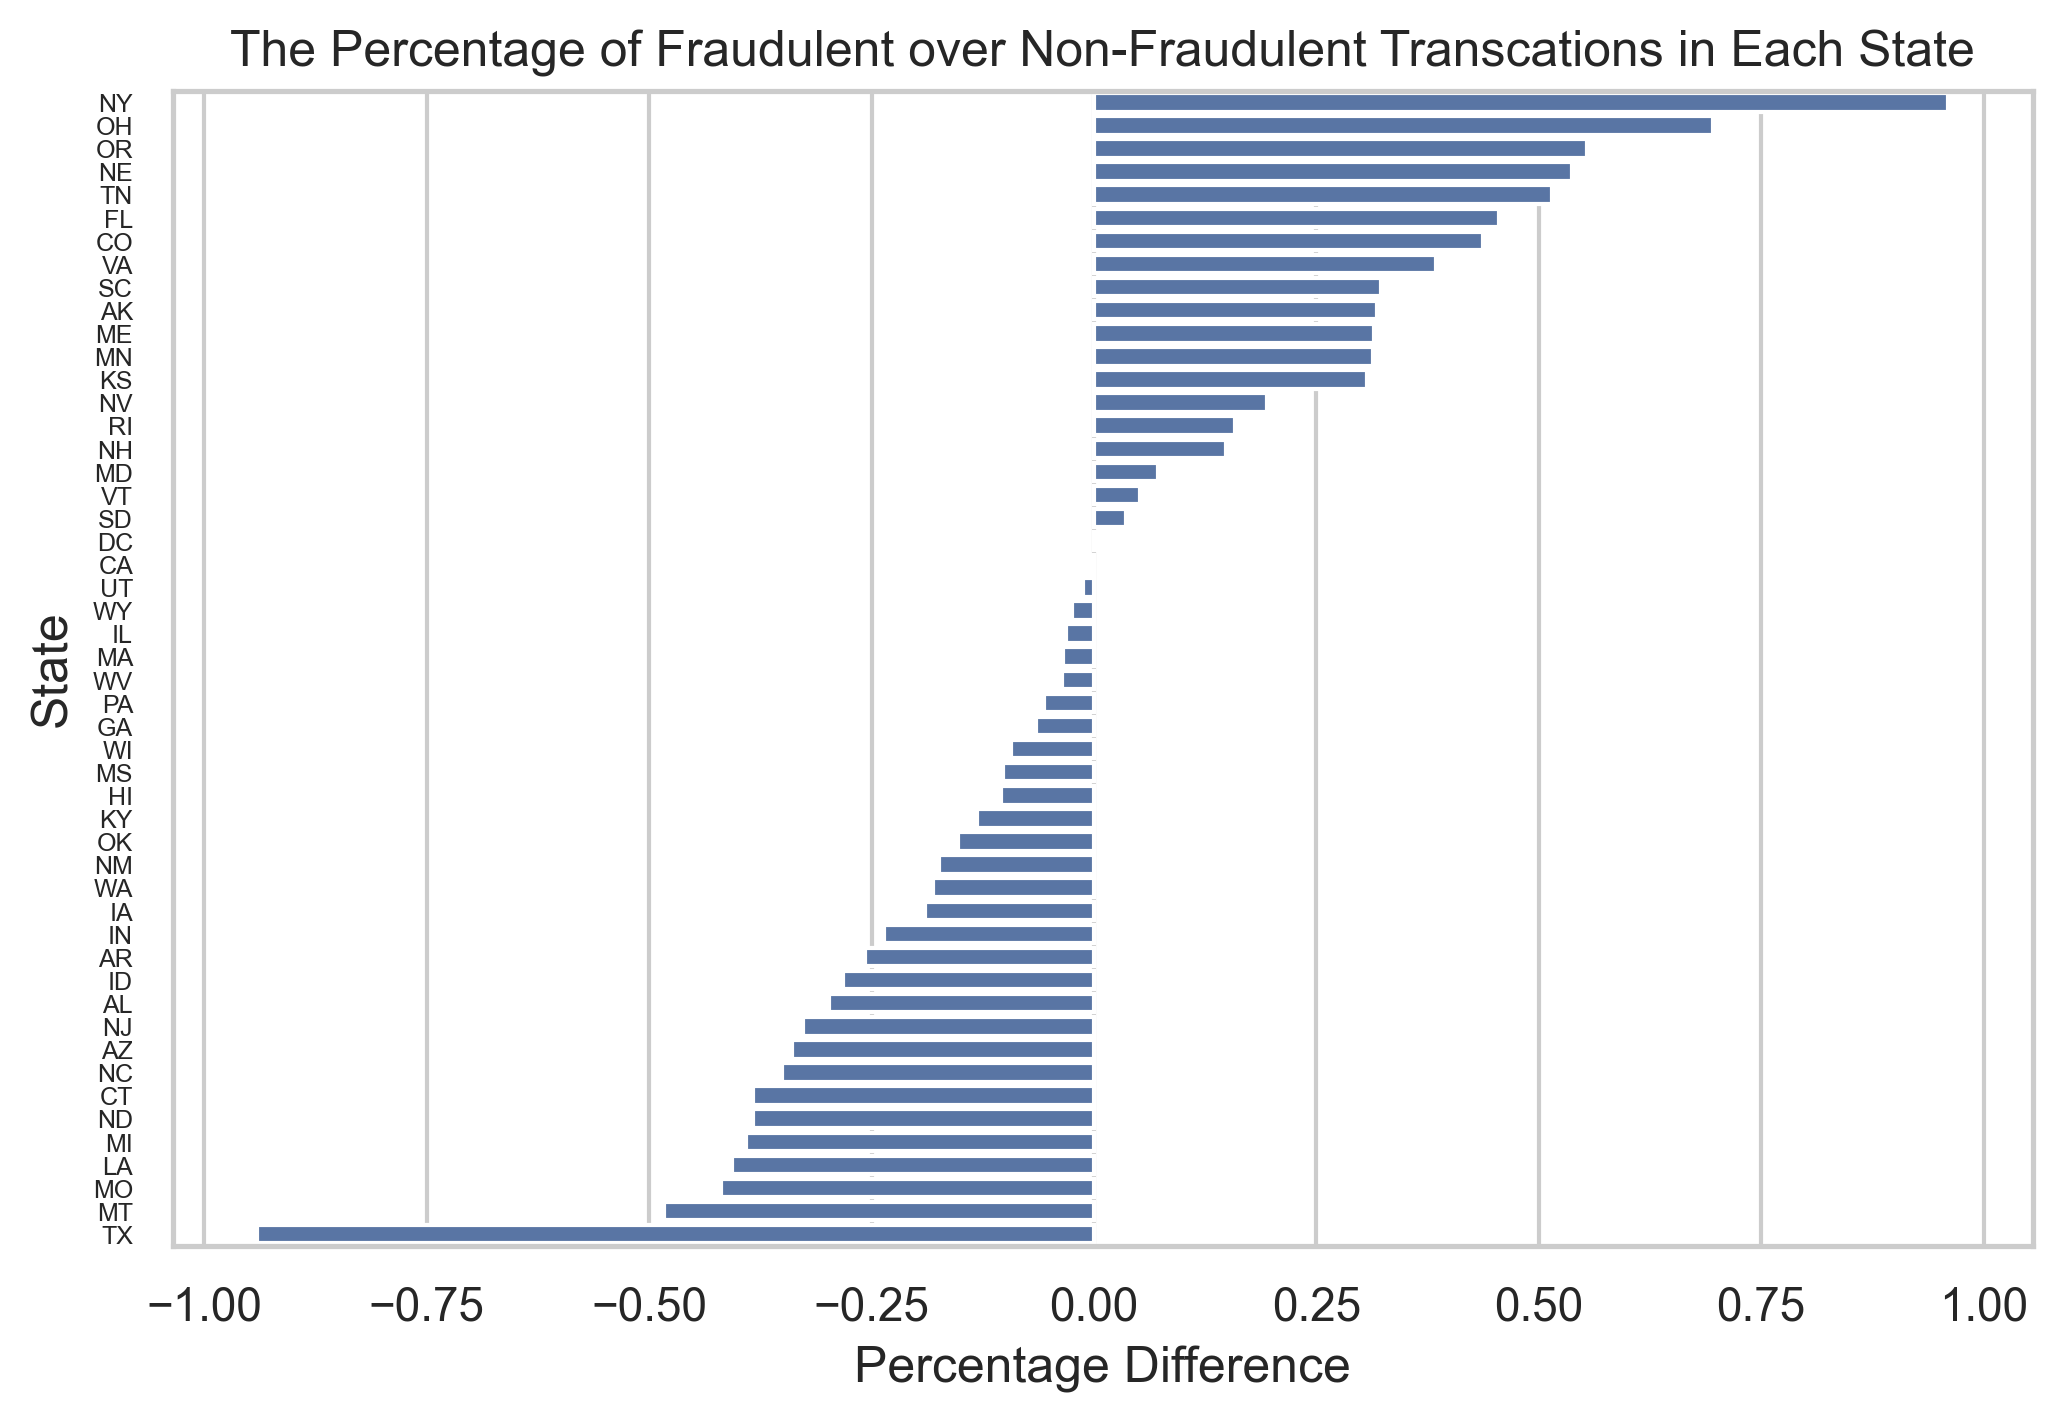

In [20]:
plt.figure(dpi=300)

a=train_df['state'][train_df.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']

b=train_df['state'][train_df.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

ax1=sns.barplot(data=merged, x='diff',y='State')
ax1.set_xlabel('Percentage Difference')
ax1.tick_params(axis='y', labelsize=6)
ax1.set_ylabel('State')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

## 2) Train Test Split

In [22]:
test_df = pd.read_csv("data/fraud-detection/fraudTest.csv")
train_df = pd.read_csv("data/fraud-detection/fraudTrain.csv")

In [23]:
train_df = train_df.drop(columns=["Unnamed: 0"])
test_df = test_df.drop(columns=["Unnamed: 0"])

In [24]:
X_train = train_df.drop(columns=["is_fraud"])
y_train = train_df["is_fraud"]

In [25]:
X_test = test_df.drop(columns=["is_fraud"])
y_test = test_df["is_fraud"]

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [27]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1167007, 21)
(129668, 21)
(555719, 21)


## 3) Preprocessing

In [ ]:
import numpy as np
import pandas as pd
from math import radians, sin, cos, asin, sqrt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
import datetime as dt

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        def parse_times(df):
            df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
            df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
            df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
            df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
            return df

        def age_from_dob(df):
            df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
            return df

        def haversine(lat1, lon1, lat2, lon2):
            # All in degrees → meters
            r = 6371000.0
            lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
            dlat = lat2 - lat1
            dlon = lon2 - lon1
            a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
            return 2 * r * np.arcsin(np.sqrt(a))

        df = parse_times(df)
        df = age_from_dob(df)
        df['cust_merch_dist'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])

        return df

In [30]:
num_features = ["amt", "city_pop", "age", "hour", "day", "month", "cust_merch_dist"]
cat_features = ["gender", "category"]

In [31]:
from sklearn.pipeline import Pipeline

transformer = ColumnTransformer(transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown="ignore", min_frequency=50, sparse_output=True), cat_features)
    ])

preprocessing = Pipeline(steps=[
    ('feature_engineer', FeatureEngineer()),
    ('transformer', transformer)
])

In [32]:
X_train_pre = preprocessing.fit_transform(X_train)
X_val_pre = preprocessing.transform(X_val)
X_test_pre = preprocessing.transform(X_test)

## 4) Training Model

### 4.1) Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1)

log_reg.fit(X_train_pre, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [62]:
y_train_proba = log_reg.predict_proba(X_train_pre)[:, 1]
y_test_proba = log_reg.predict_proba(X_test_pre)[:, 1]
y_val_proba = log_reg.predict_proba(X_val_pre)[:, 1]

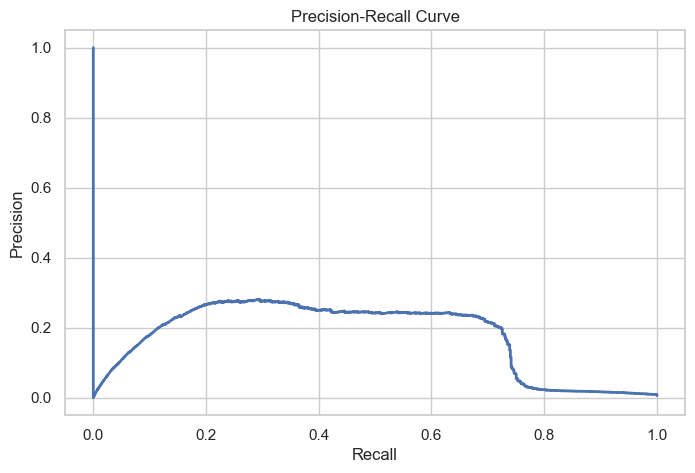

Train PR-AUC:   0.1679
Val PR-AUC:     0.1735
Test PR-AUC:    0.1216


In [64]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_proba)

plt.plot(recalls, precisions, linewidth=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

print(f"Train PR-AUC:   {average_precision_score(y_train,  y_train_proba):.4f}")
print(f"Val PR-AUC:     {average_precision_score(y_val,  y_val_proba):.4f}")
print(f"Test PR-AUC:    {average_precision_score(y_test, y_test_proba):.4f}")

### 4.2) Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="sqrt",
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

rdf.fit(X_train_pre, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
y_train_proba = rdf.predict_proba(X_train_pre)[:, 1]
y_test_proba = rdf.predict_proba(X_test_pre)[:, 1]
y_val_proba = rdf.predict_proba(X_val_pre)[:, 1]

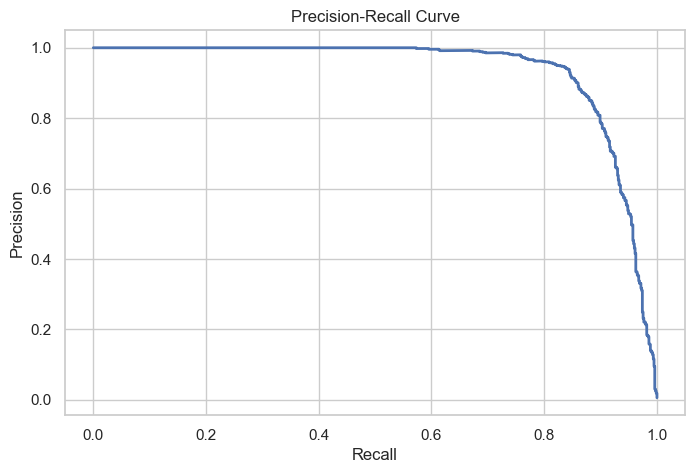

Train PR-AUC:   0.9951
Val PR-AUC:     0.9346
Test PR-AUC:    0.8804


In [60]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_proba)

plt.plot(recalls, precisions, linewidth=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

print(f"Train PR-AUC:   {average_precision_score(y_train,  y_train_proba):.4f}")
print(f"Val PR-AUC:     {average_precision_score(y_val,  y_val_proba):.4f}")
print(f"Test PR-AUC:    {average_precision_score(y_test, y_test_proba):.4f}")

### 4.3) Random Forest with Over Sampling

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

random_overs_pipeline = make_pipeline(
    RandomOverSampler(random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=13)
)

In [73]:
random_overs_pipeline.fit(X_train_pre, y_train)

,steps,"[('randomoversampler', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,shrinkage,None
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [77]:
y_train_proba = random_overs_pipeline.predict_proba(X_train_pre)[:, 1]
y_test_proba = random_overs_pipeline.predict_proba(X_test_pre)[:, 1]
y_val_proba = random_overs_pipeline.predict_proba(X_val_pre)[:, 1]

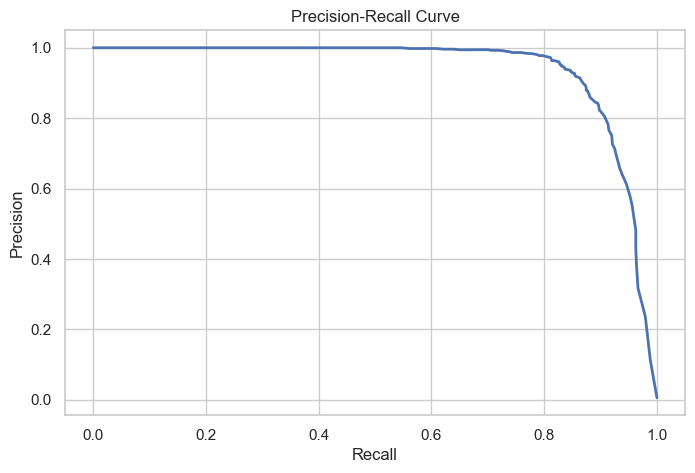

Train PR-AUC:   1.0000
Val PR-AUC:     0.9368
Test PR-AUC:    0.8802


In [75]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_proba)

plt.plot(recalls, precisions, linewidth=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

print(f"Train PR-AUC:   {average_precision_score(y_train,  y_train_proba):.4f}")
print(f"Val PR-AUC:     {average_precision_score(y_val,  y_val_proba):.4f}")
print(f"Test PR-AUC:    {average_precision_score(y_test, y_test_proba):.4f}")

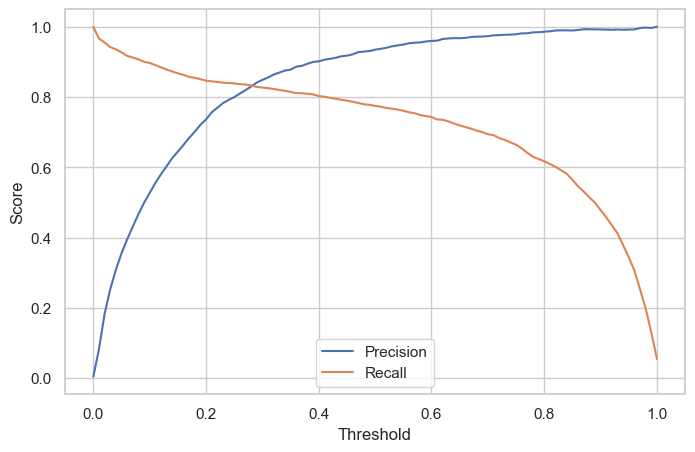

In [78]:
from sklearn.metrics import precision_recall_curve

prec, rec, thr = precision_recall_curve(y_test, y_test_proba)

# Plot tradeoff
import matplotlib.pyplot as plt
plt.plot(thr, prec[:-1], label="Precision")
plt.plot(thr, rec[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

### 4.4) Random Forest with SMOTE

In [43]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

clf = ImbPipeline(steps=[
    ('fe', FeatureEngineer()),
    ('transforming', transformer),
    ('smote', SMOTE(sampling_strategy=0.0643115174735617,
                    k_neighbors=4,
                    random_state=42)),
    ('clf', RandomForestClassifier(random_state=42,
                                   n_estimators=979,
                                   max_depth=11,
                                   min_samples_leaf=2,
                                   max_features='sqrt',
                                   bootstrap=True,
                                   ccp_alpha=0.0,
                                   n_jobs=-1))
])

clf.fit(X_train, y_train)

,steps,"[('fe', ...), ('transforming', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [44]:
y_train_proba = clf.predict_proba(X_train)[:, 1]
y_val_proba = clf.predict_proba(X_val)[:, 1]
y_test_proba = clf.predict_proba(X_test)[:, 1]

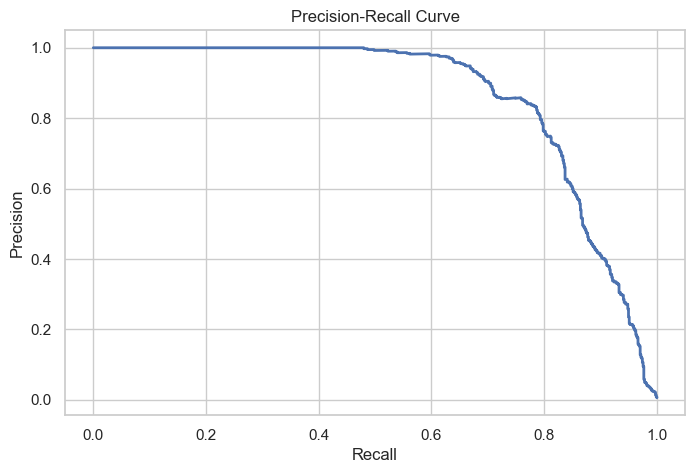

Train PR-AUC:   0.8619
Val PR-AUC:     0.8606
Test PR-AUC:    0.8026


In [54]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_proba)

plt.plot(recalls, precisions, linewidth=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

print(f"Train PR-AUC:   {average_precision_score(y_train,  y_train_proba):.4f}")
print(f"Val PR-AUC:     {average_precision_score(y_val,  y_val_proba):.4f}")
print(f"Test PR-AUC:    {average_precision_score(y_test, y_test_proba):.4f}")